In [1]:
import numpy as np
import pandas as pd
import glob
from pathlib import Path
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def bbox_yolo2voc(bx, w, h):
    x_c = float(bx[0])*w
    y_c = float(bx[1])*h
    wbbox = float(bx[2])*w
    hbbox = float(bx[3])*h
    x1 = int(x_c - wbbox/2)
    y1 = int(y_c - hbbox/2)
    x2 = int(x_c + wbbox/2)
    y2 = int(y_c + hbbox/2)
    bbox = [x1, y1, x2, y2]
    return bbox

In [3]:
def bbox_voc2yolo(bx, w, h):
    x1 = bx[0]
    y1 = bx[1]
    x2 = bx[2]
    y2 = bx[3]
    w_bbox = x2 - x1
    h_bbox = y2 - y1
    x_c = x1 + w_bbox/2
    y_c = y1 + h_bbox/2
    bbox = [x_c/w, y_c/h, w_bbox/w, h_bbox/h]
    return bbox

In [4]:
def bbox_coco2voc(bbox):
    bbox[2] = bbox[0] + bbox[2]
    bbox[3] = bbox[1] + bbox[3]
    return bbox

In [5]:
# def bbox_2coco2voc(bbox):
#     w, h = bbox[2] - bbox[0], bbox[3] - bbox[1]
#     bbox[0] = int(bbox[0] + w/2)
#     bbox[1] = int(bbox[1] + h/2)
#     bbox[2] = int(bbox[2] + w/2)
#     bbox[3] = int(bbox[3] + h/2)
#     return bbox

In [6]:
def draw_bbox(img_np, box_coco):
    id_ = int(box_coco[0])
    x1 = int(box_coco[1])
    y1 = int(box_coco[2])
    x2 = int(box_coco[3])
    y2 = int(box_coco[4])
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.rectangle(img_np,(x1, y1),(x2, y2),(0,0,255),thickness=2)
    f = cv2.putText(img_np, text=str(id_), org=(x1 + 5, y1 + 5), fontFace=font, fontScale=1, 
        thickness=2, lineType=cv2.LINE_AA, color=(0, 255, 0))
    return img_np

In [7]:
Path.cwd()

PosixPath('/home/chenyi/workspace/myPyModule99')

In [ ]:
ROOT = Path('/nas/chenyi/dataset_apparel_nas/')

#### pandas数据画图

In [ ]:
of_df = pd.read_csv('/nas/lichangjian/open_fashion/df_OpenFashion.csv')

In [ ]:
ind = 490311
p = of_df.loc[ind]['path']
bboxes = [of_df.loc[ind][['label_2', 'x_1','y_1', 'x_2', 'y_2']].values.tolist()]
of_df.loc[ind]['source']

In [ ]:
# p = '/nas/lichangjian/open_fashion/DeepFashion/Category and Attribute Prediction Benchmark/Img/img/Sheer_Pleated-Front_Blouse/img_00000012.jpg' 
# bboxes = [[1, 68, 82, 190, 290]]

In [ ]:
bboxes

In [ ]:
img_np = cv2.imread(str(p))
img_np = cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB)
w = img_np.shape[0]
h = img_np.shape[1]

In [ ]:
for bx in bboxes:
    # bx[1:] = bbox_coco2voc(bx[1:])
    draw_bbox(img_np, bx)

In [ ]:
Image.fromarray(img_np)

#### 路径画图

In [ ]:
f_id = '003a6ca3eaa7886da61ed2de2c5e8d27'
fname = f_id + '.jpg'
row = data_pd[data_pd['file_name'] == fname]

In [ ]:
bboxes = row['bbox'].values[0]
mode = row['train'].values[0]
p = ROOT/ 'images' / mode / fname

In [ ]:
p = '/nas/lichangjian/open_fashion/DeepFashion/Category and Attribute Prediction Benchmark/Img/img/Abstract_Print_Woven_Cardigan/img_00000021.jpg'

In [ ]:
img_np = cv2.imread(str(p))
img_np = cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB)

In [ ]:
bboxes = [[1, 68.0, 9.0, 168.0, 152.0]]

for bx in bboxes:
    w = img_np.shape[0]
    h = img_np.shape[1]
    # bx[1:] = bbox_coco2voc(bx[1:])
    draw_bbox(img_np, bx)

In [ ]:
Image.fromarray(img_np)

### HTML Display

In [17]:
import sys
sys.path.append('../../')
from utils.display.html import *
from IPython.display import HTML
from io import BytesIO

/home/chenyi/workspace/myPyModule99/utils/display/html.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [23]:
img_list = glob.glob('/home/chenyi/workspace/yolov5/yolov5_ours/results/dect_results/det_hwpedia/all1/*.jpg')
len(img_list), img_list[-1]

(89515,
 '/home/chenyi/workspace/yolov5/yolov5_ours/results/dect_results/det_hwpedia/all1/2017092517065072309.jpg')

In [28]:
df_drawed = pd.DataFrame()
df_drawed['path'] = img_list[-1100:-1000]

In [29]:
size = 500
df_drawed['res'] = df_drawed['path'].map(lambda x: get_thumbnail(x, size))

In [30]:
f = df_drawed[['res', 'path']].to_html(formatters={'res': image_formatter}, escape=False)

,res,path
0,,/home/chenyi/workspace/yolov5/yolov5_ours/results/dect_results/det_hwpedia/all1/2018012023334293685.jpg
1,,/home/chenyi/workspace/yolov5/yolov5_ours/results/dect_results/det_hwpedia/all1/2017111118182135928.jpg
2,,/home/chenyi/workspace/yolov5/yolov5_ours/results/dect_results/det_hwpedia/all1/2018041015065054732.jpg
3,,/home/chenyi/workspace/yolov5/yolov5_ours/results/dect_results/det_hwpedia/all1/2018073123512515614.jpg
4,,/home/chenyi/workspace/yolov5/yolov5_ours/results/dect_results/det_hwpedia/all1/2017100820312268715.jpg
5,,/home/chenyi/workspace/yolov5/yolov5_ours/results/dect_results/det_hwpedia/all1/2017072219263330321.jpg
6,,/home/chenyi/workspace/yolov5/yolov5_ours/results/dect_results/det_hwpedia/all1/2017092508351163663.jpg
7,,/home/chenyi/workspace/yolov5/yolov5_ours/results/dect_results/det_hwpedia/all1/2017100421484233058.jpg
8,,/home/chenyi/workspace/yolov5/yolov5_ours/results/dect_results/det_hwpedia/all1/2017060815280191900.jpg
9,,/home/chenyi/workspace/yolov5/yolov5_ours/results/dect_results/det_hwpedia/all1/2017101511195608815.jpg

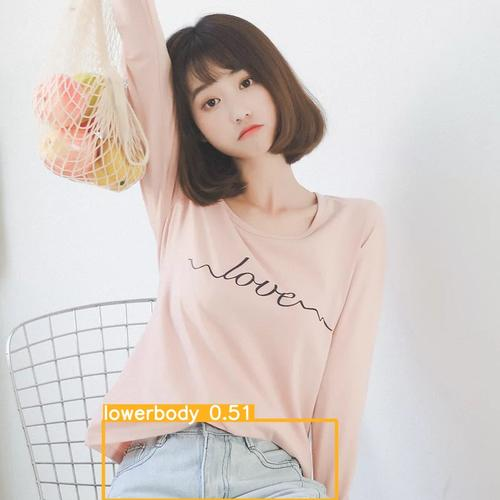
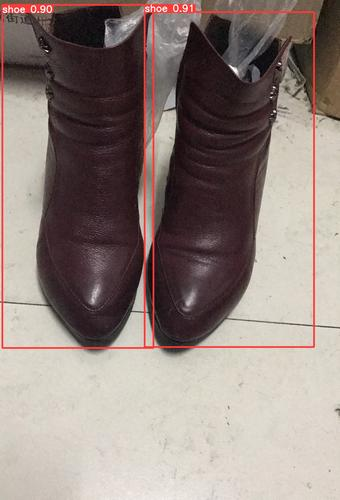
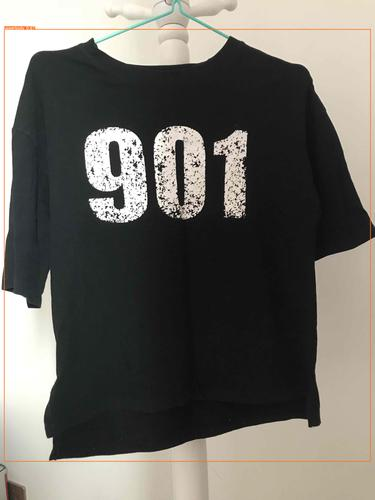
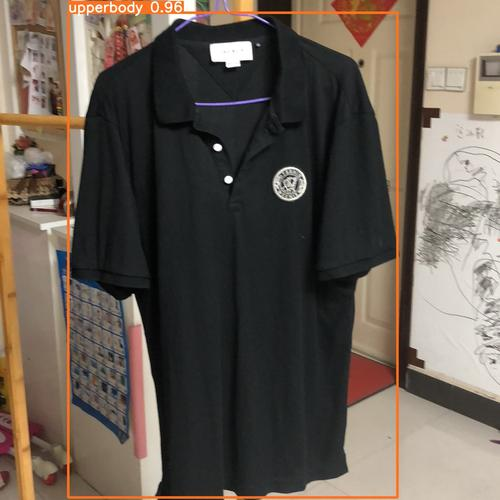
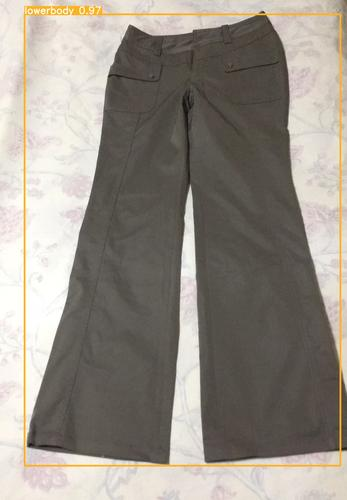
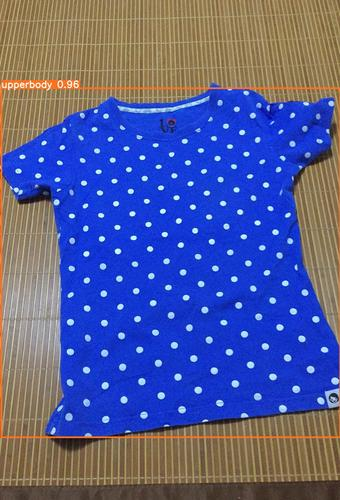
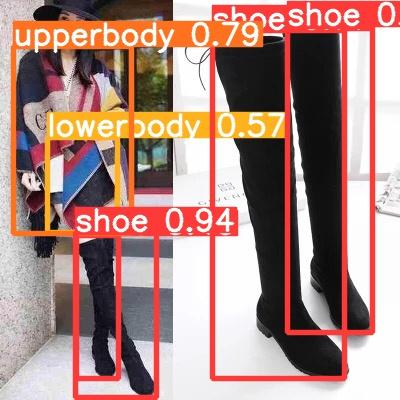
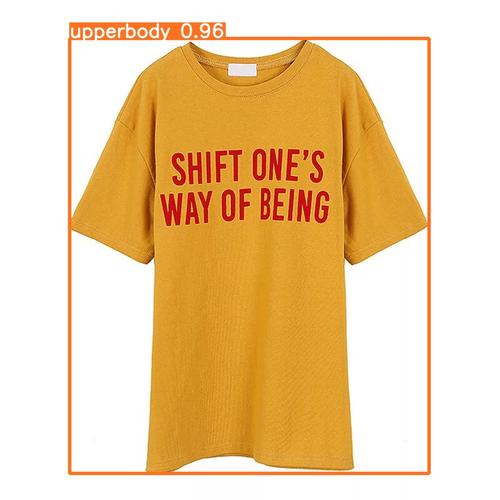
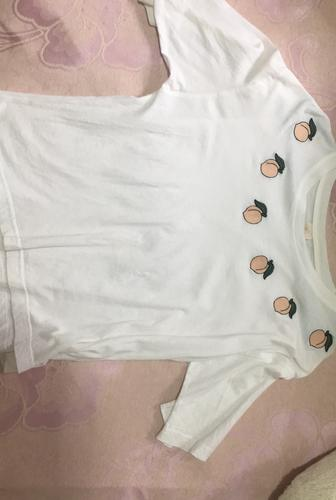
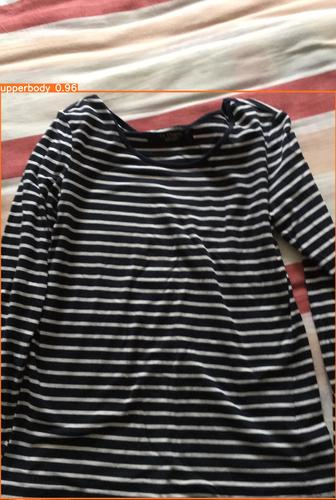
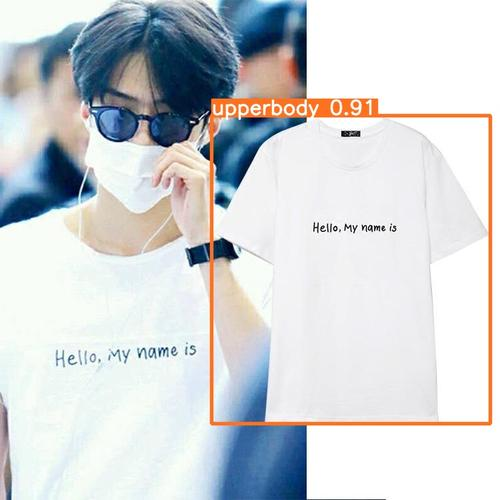
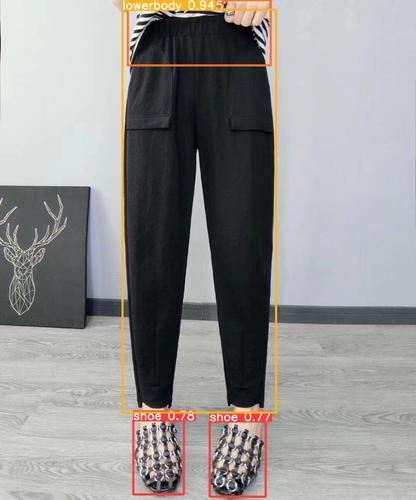
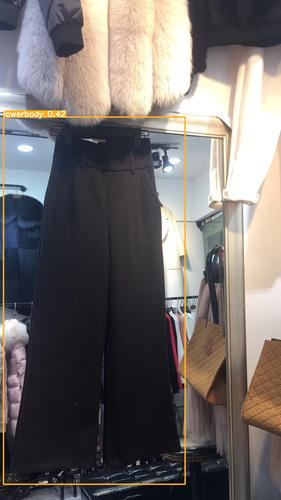
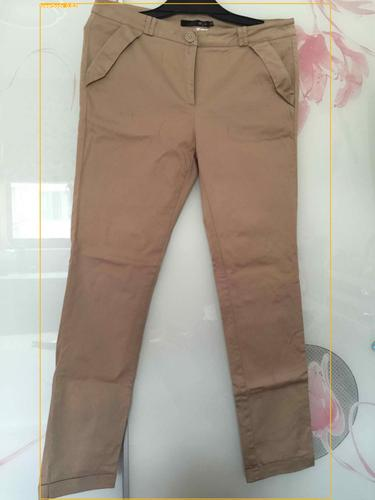
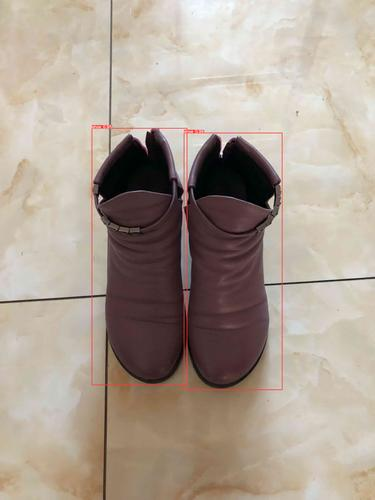
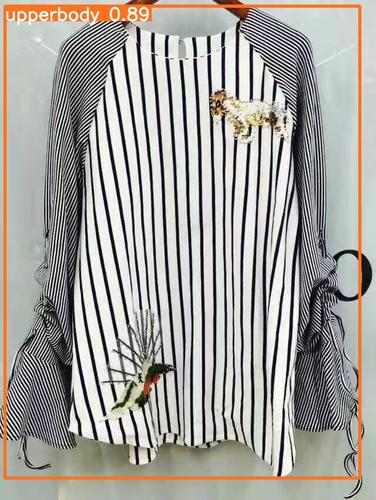
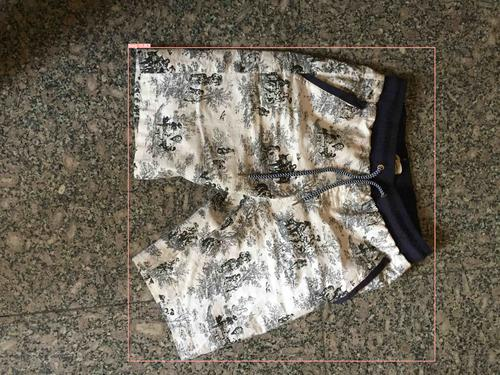
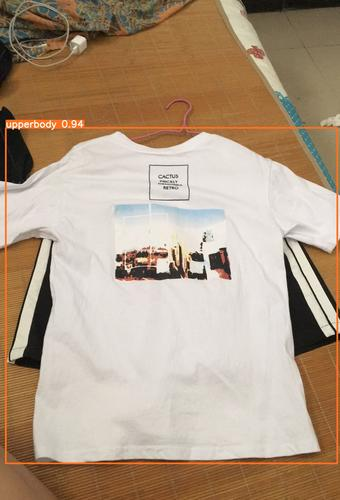
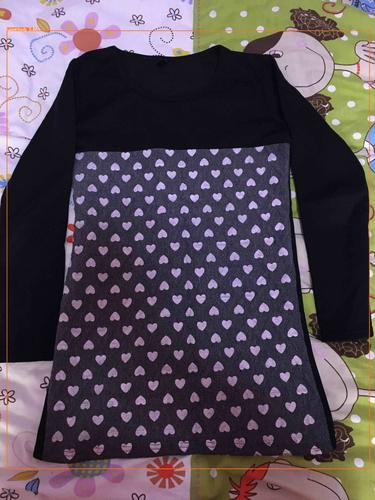
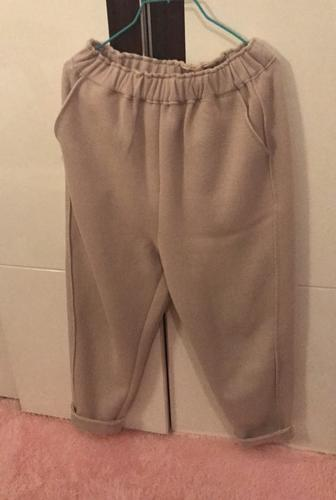
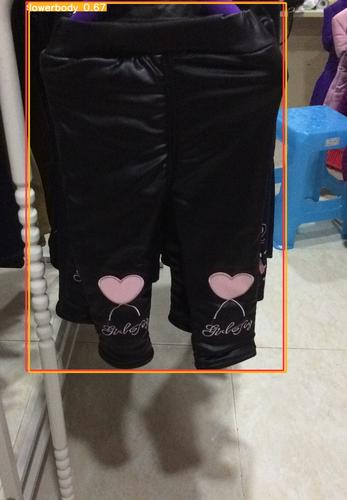
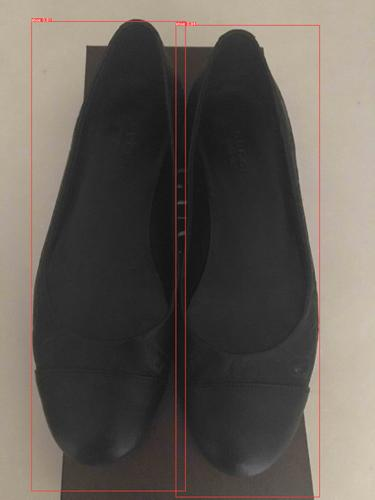
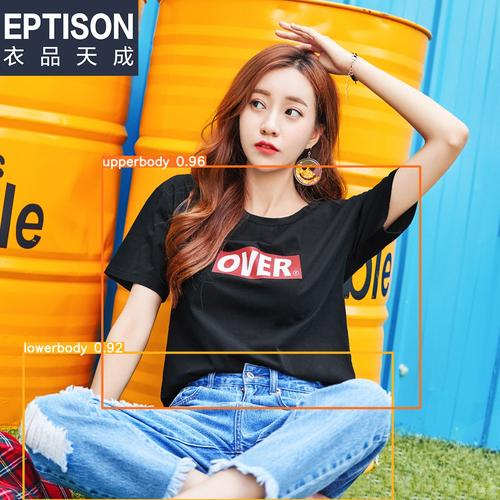
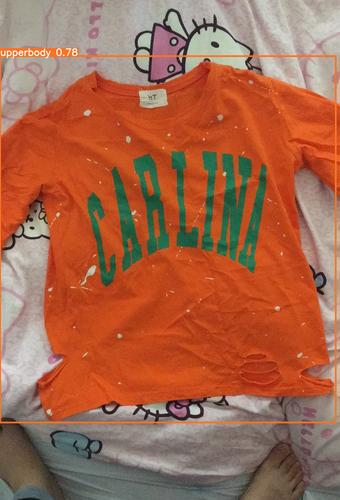
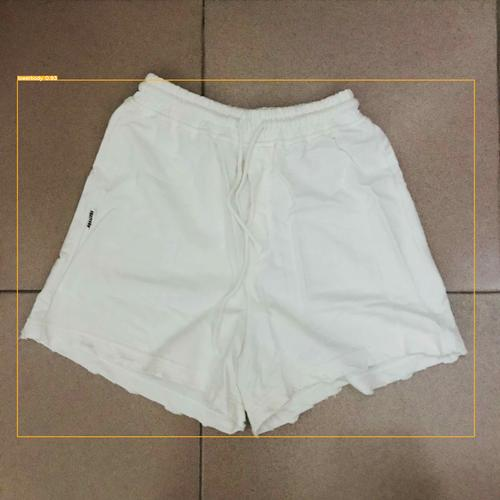
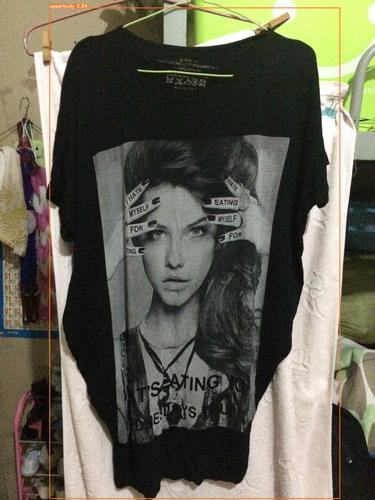
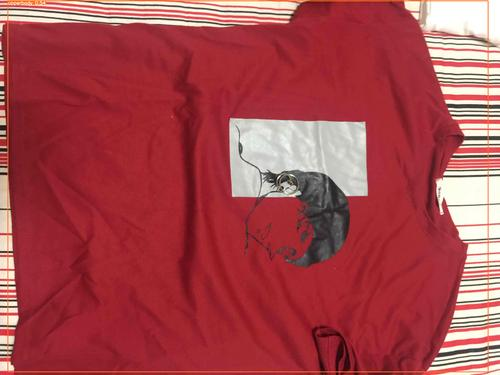
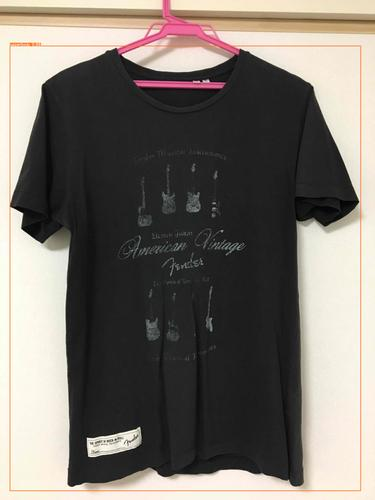
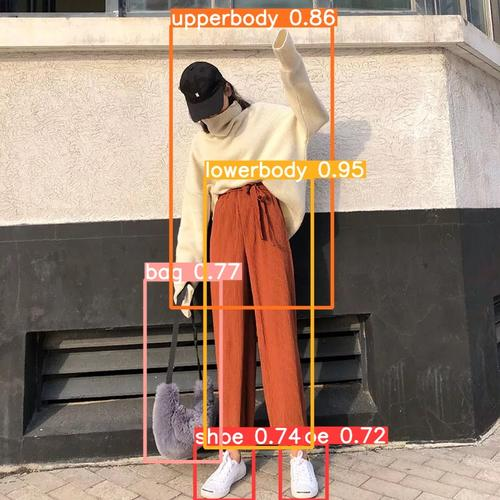
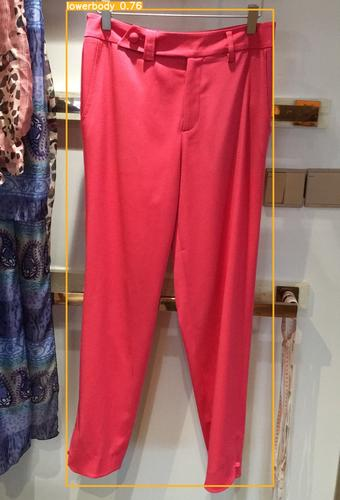
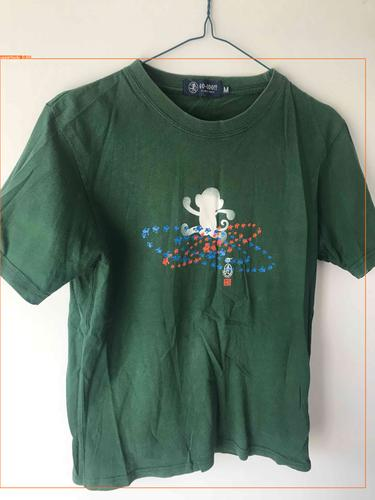
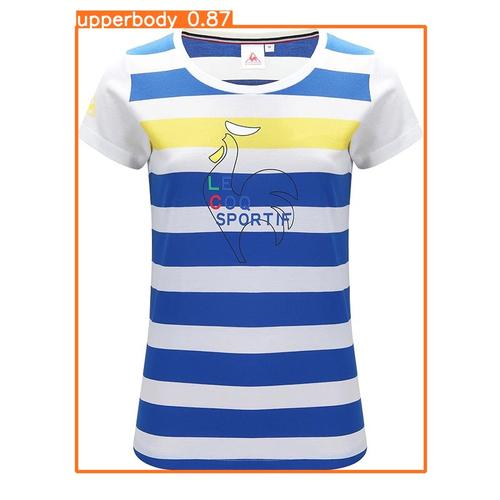
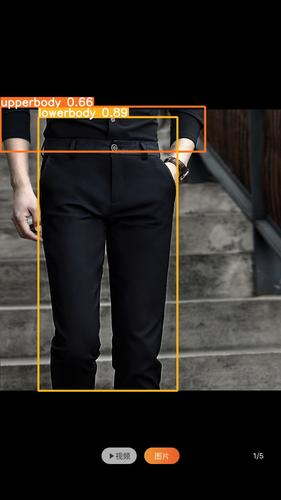
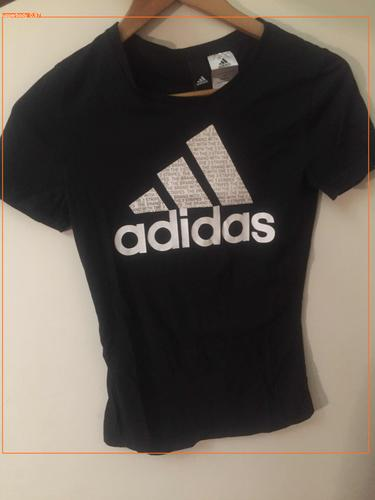
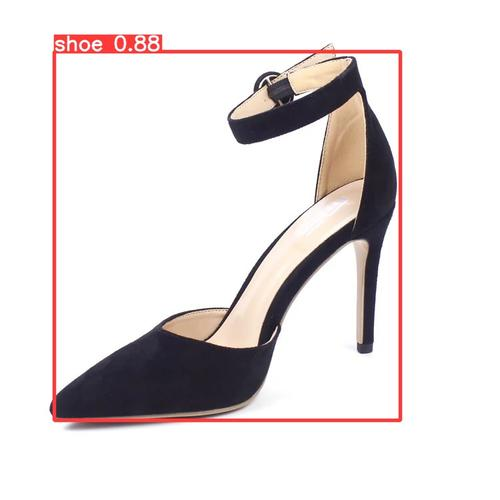
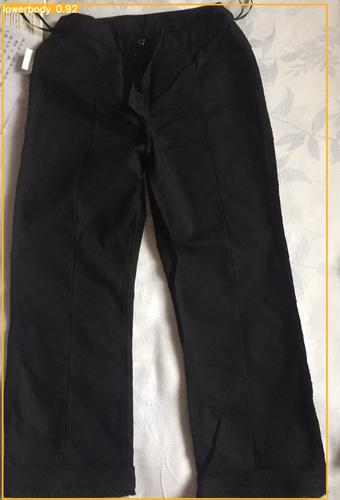
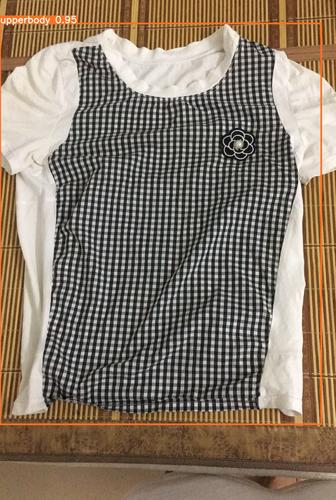
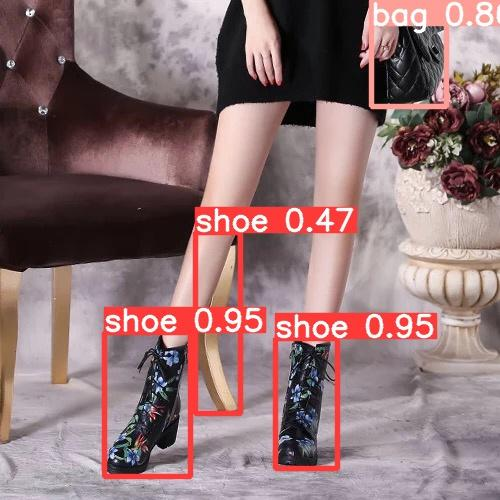
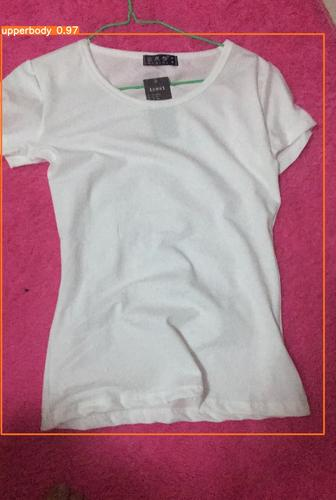
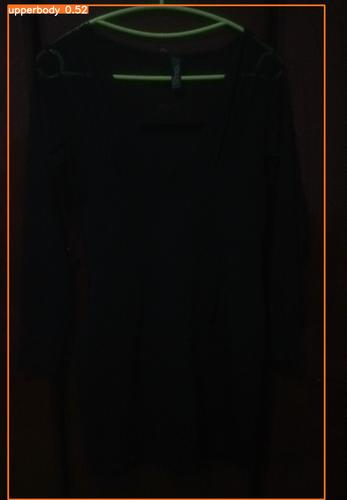
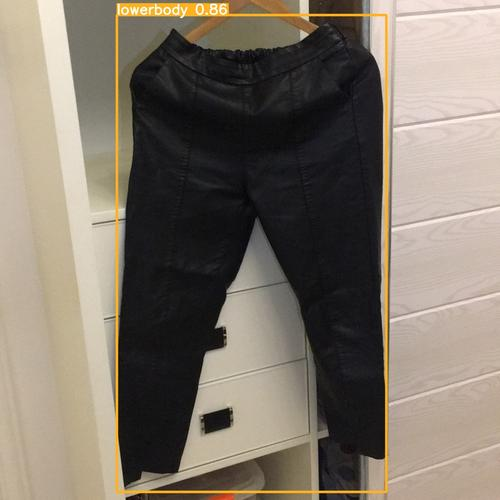
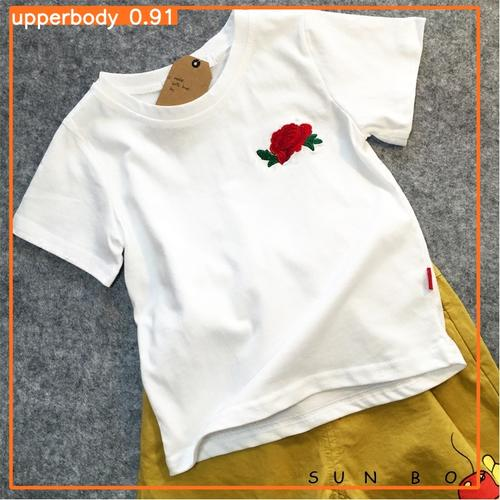
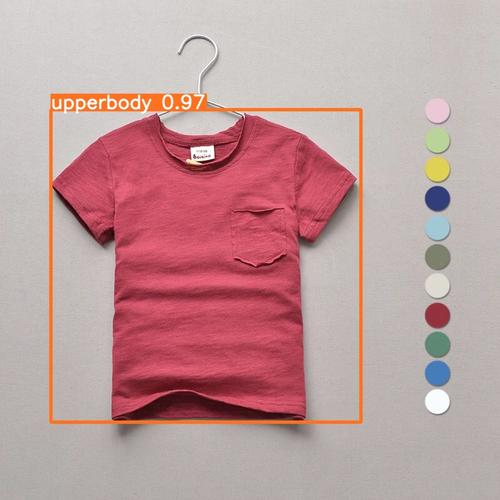
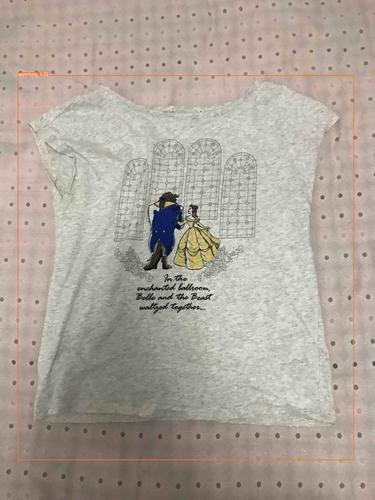
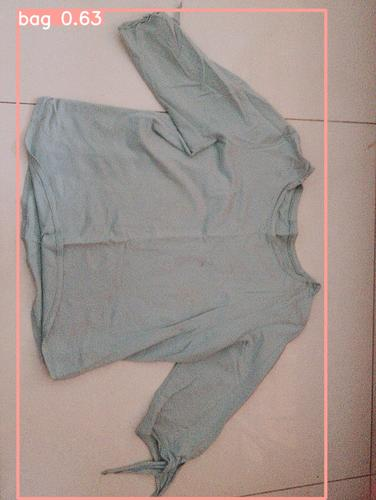
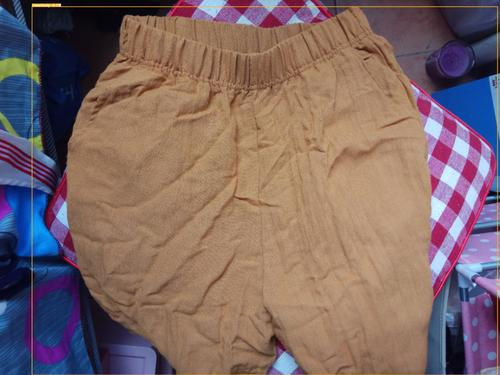
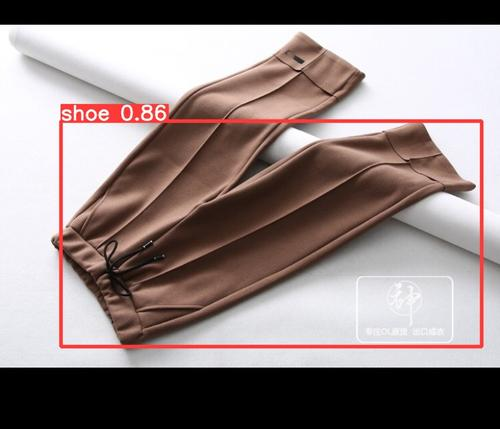
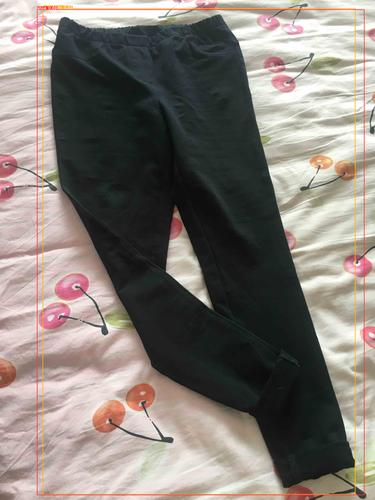
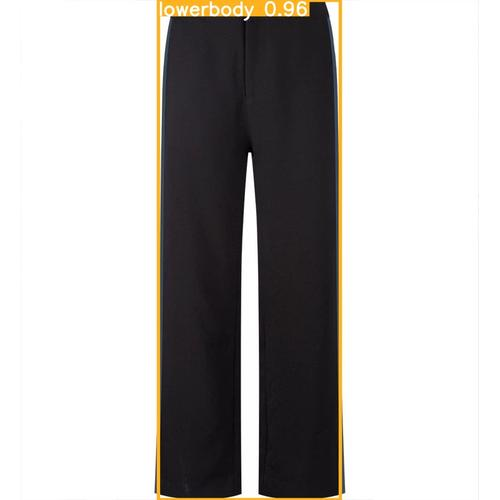
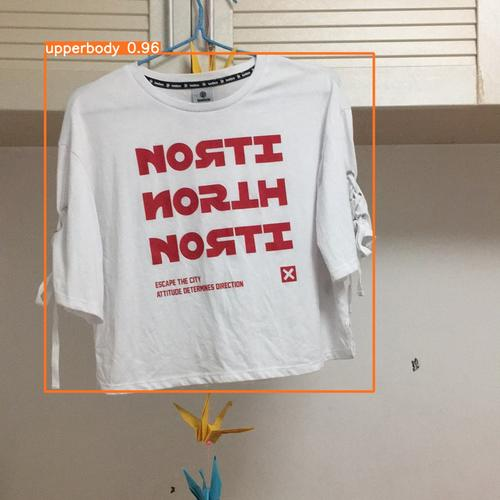
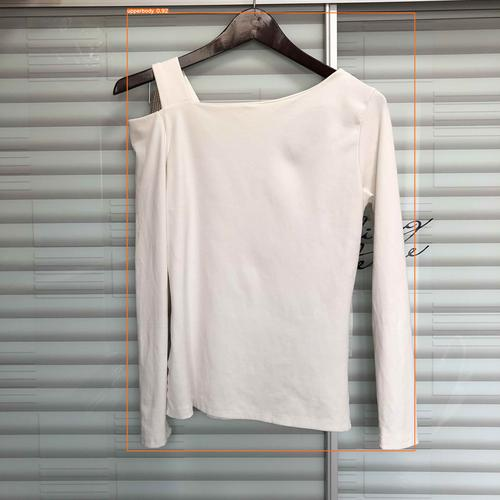
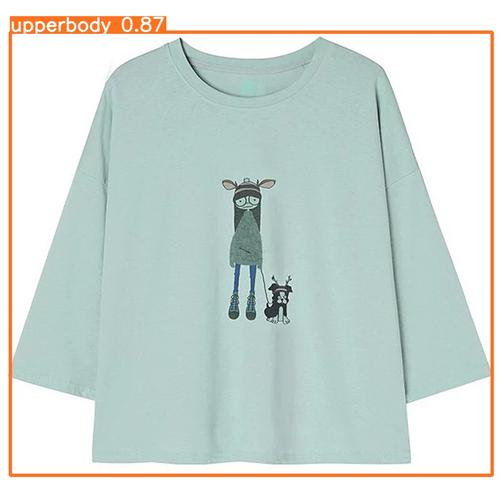
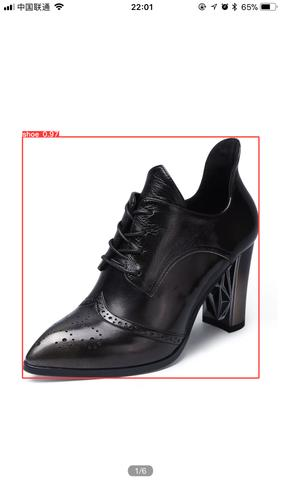
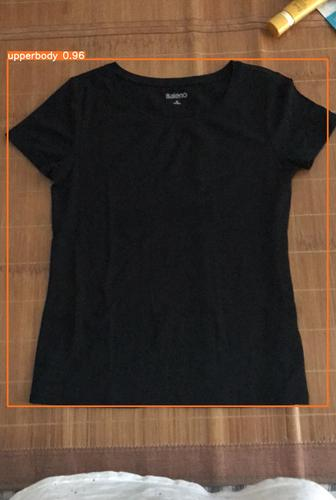
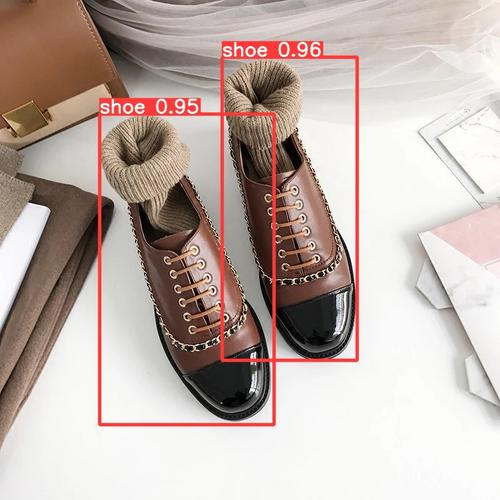
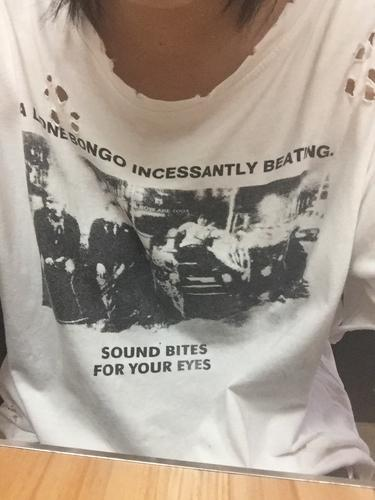
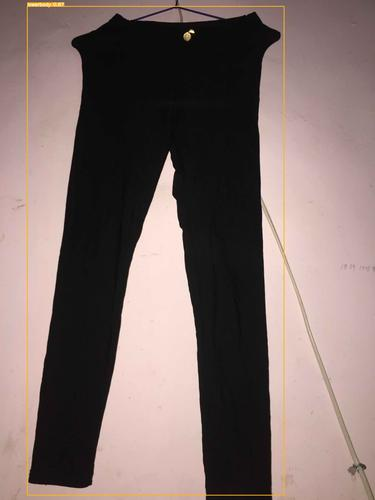
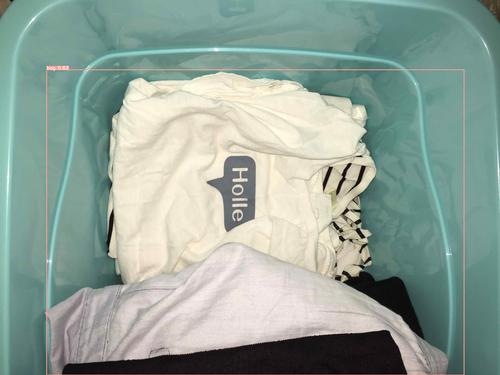
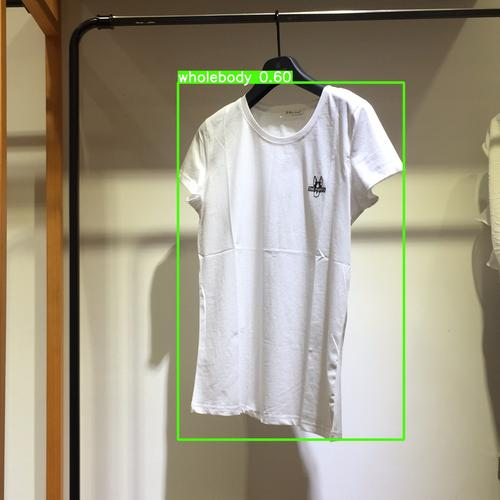
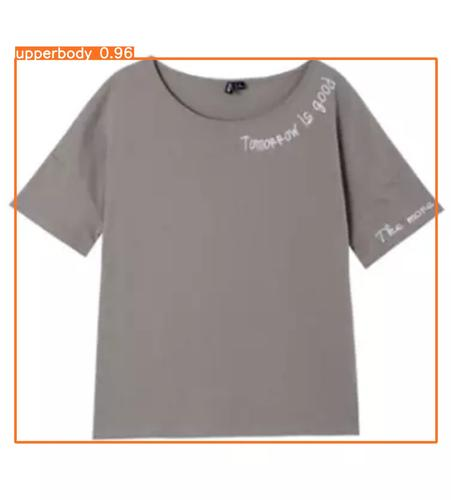
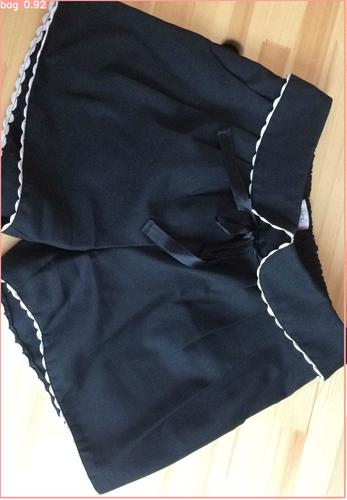
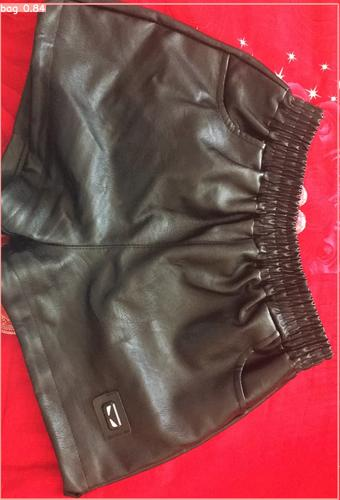
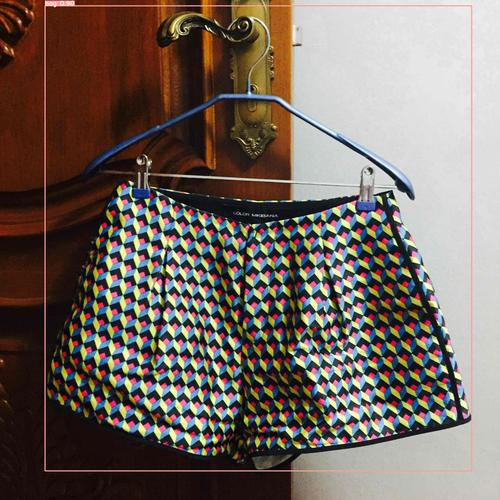
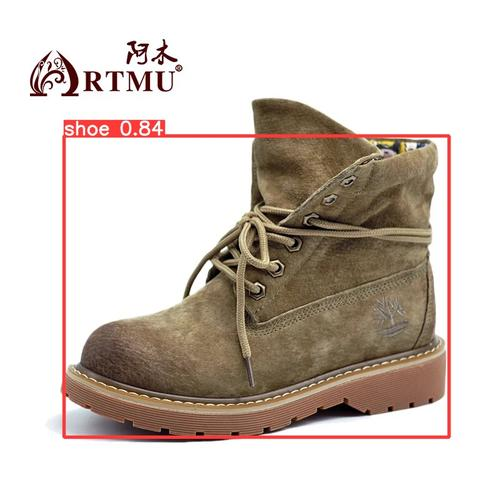
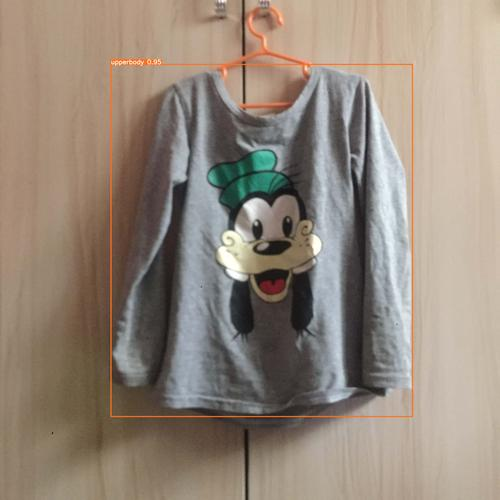
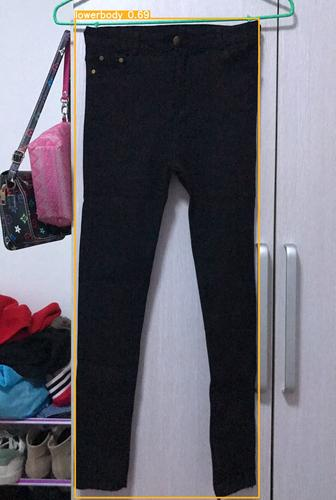
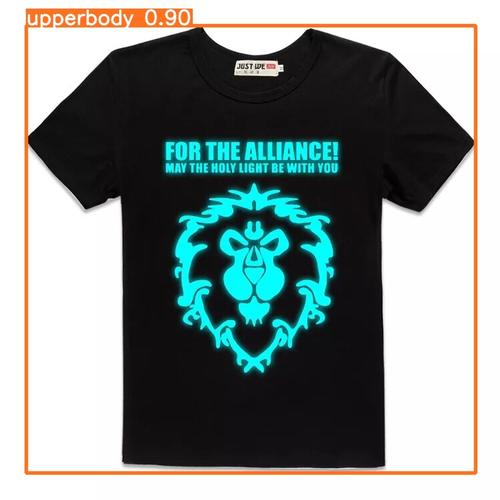
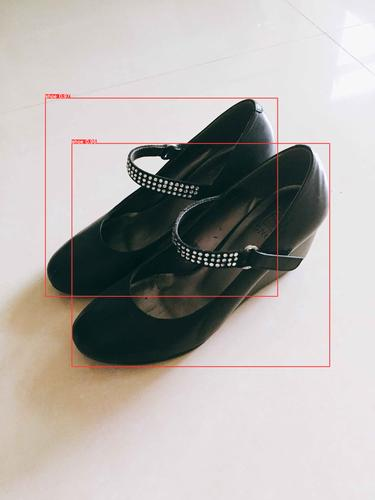
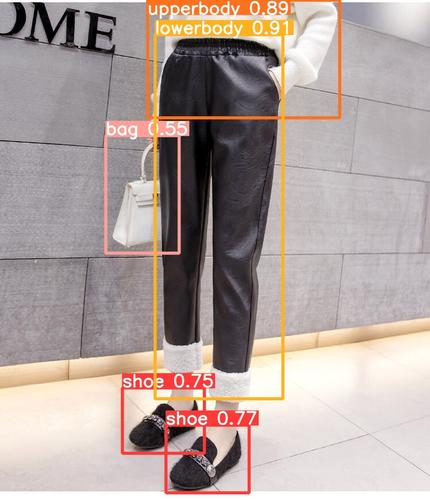
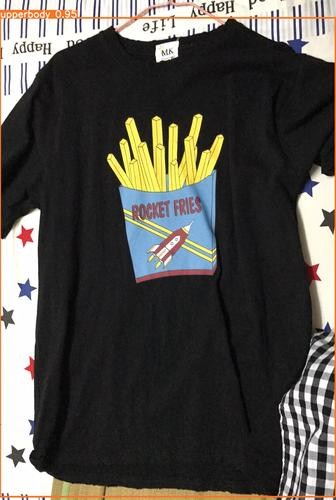
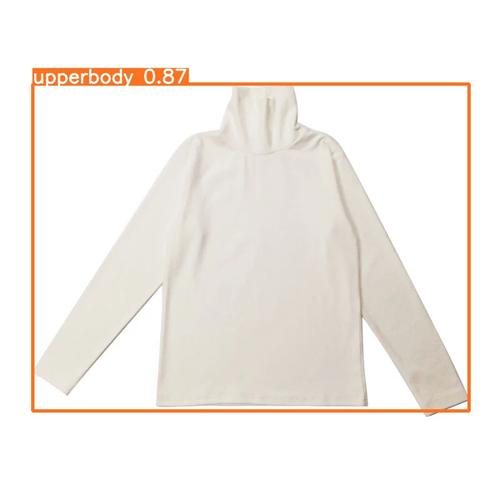
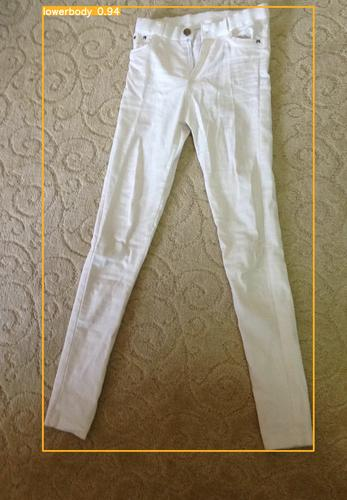
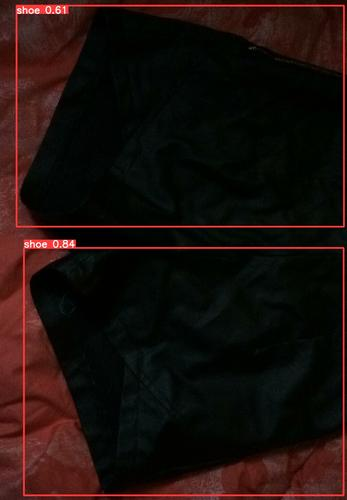
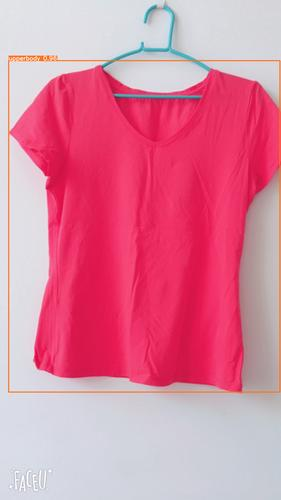
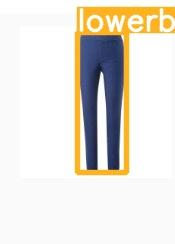
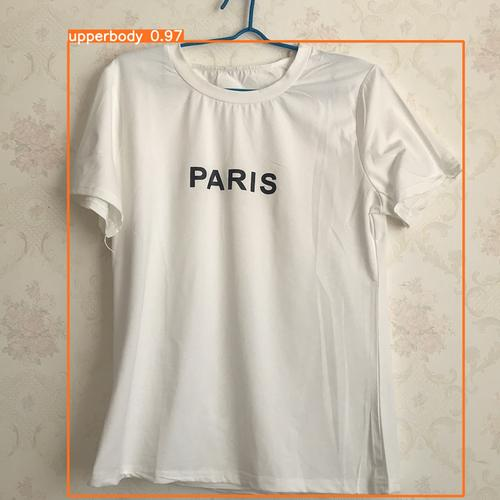
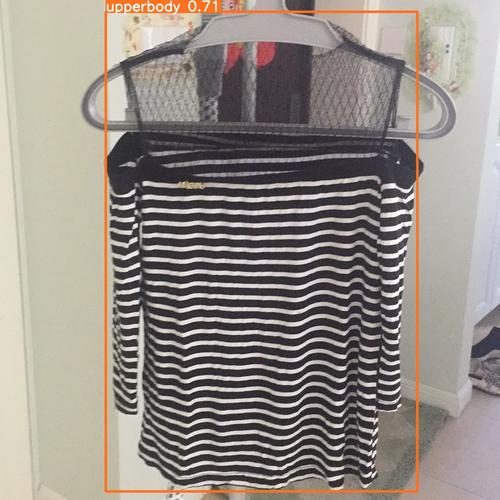
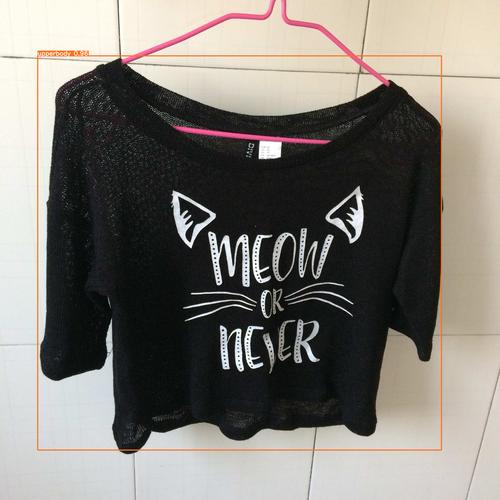
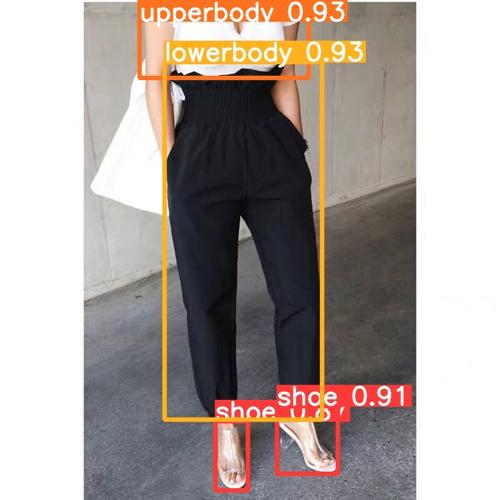
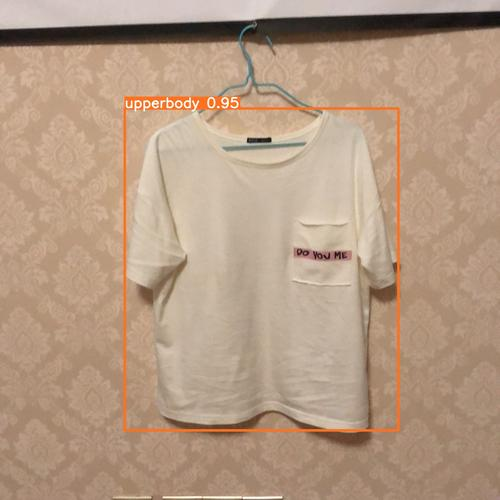
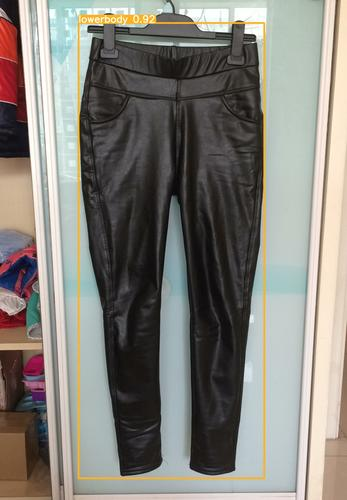
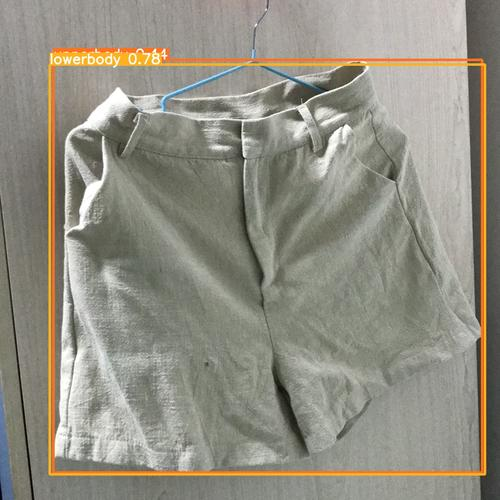
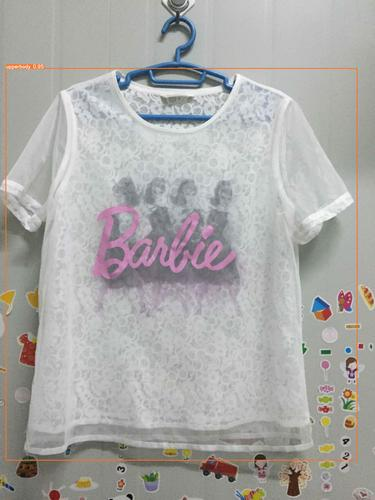
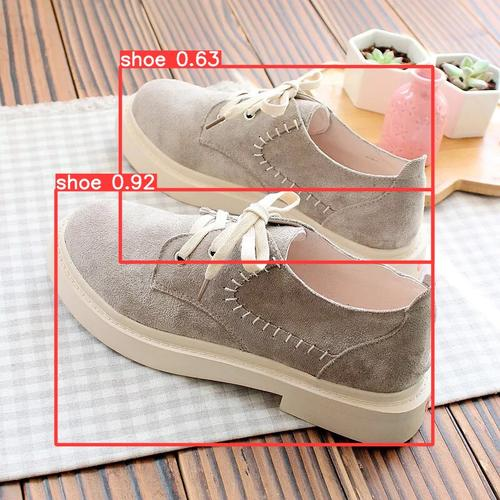
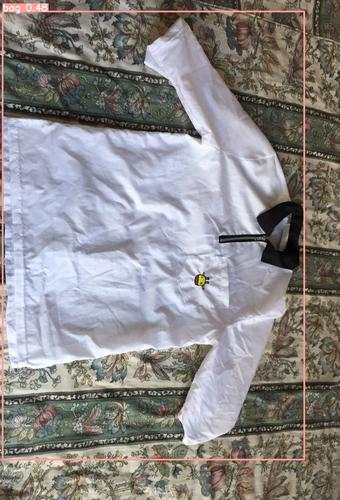
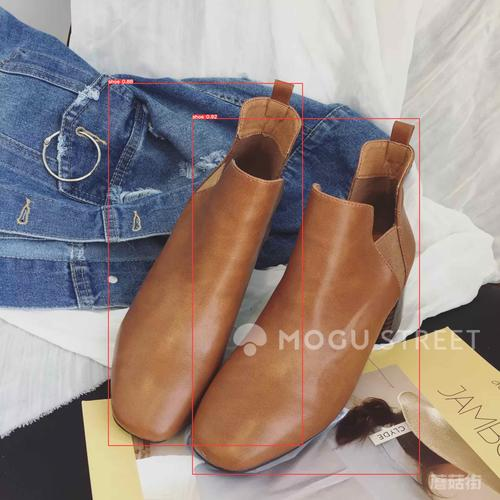
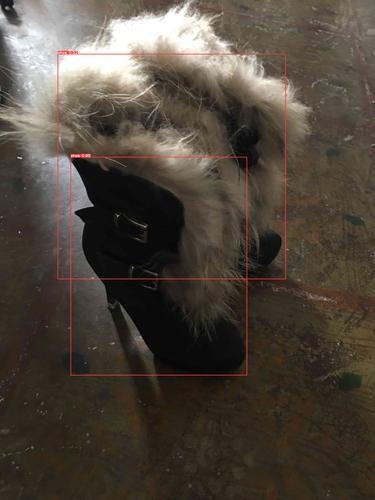
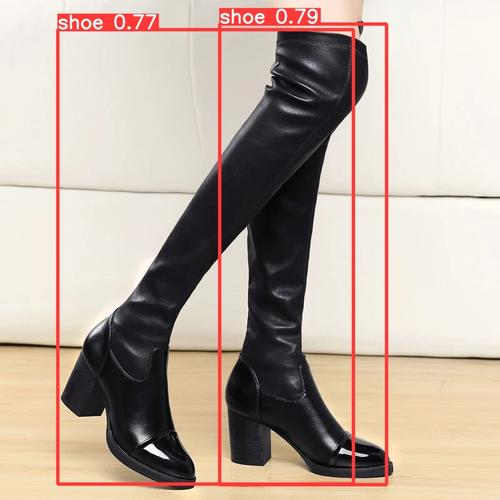
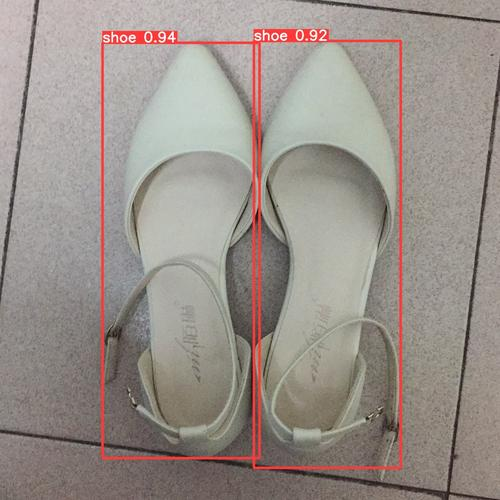
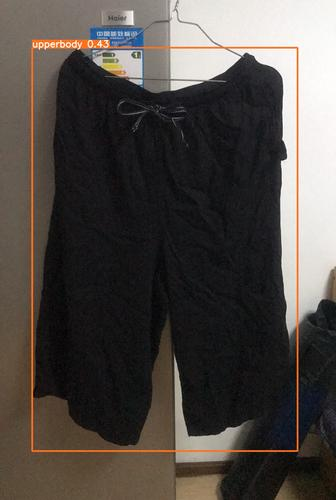
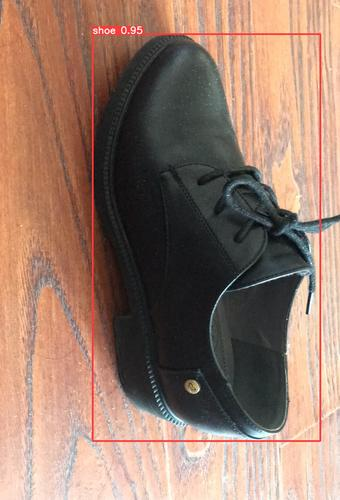
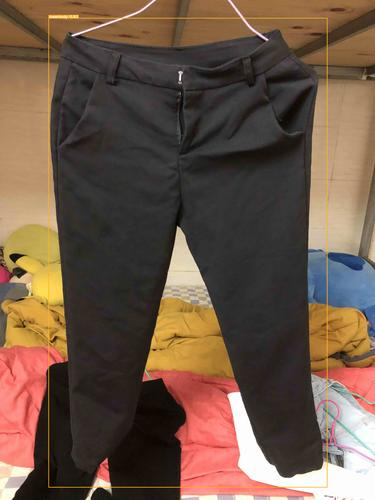
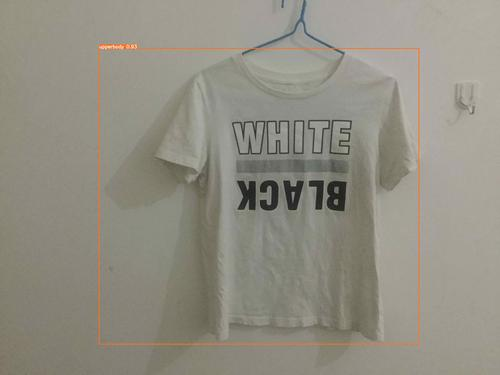
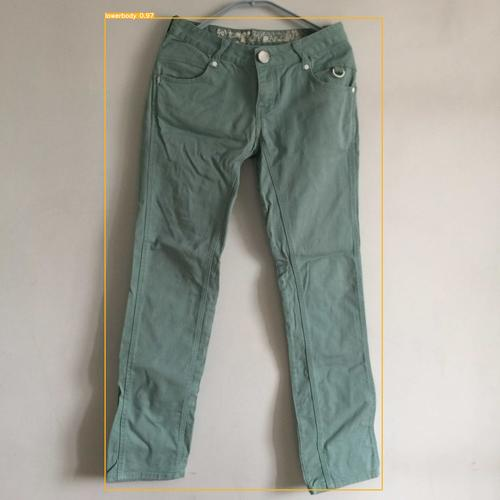
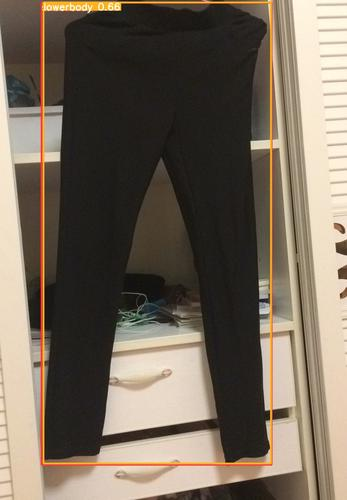
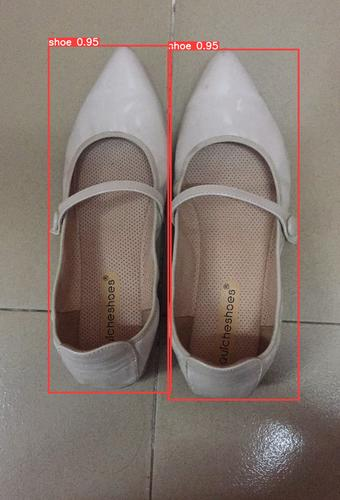
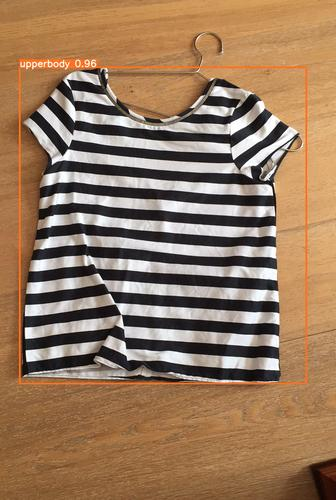
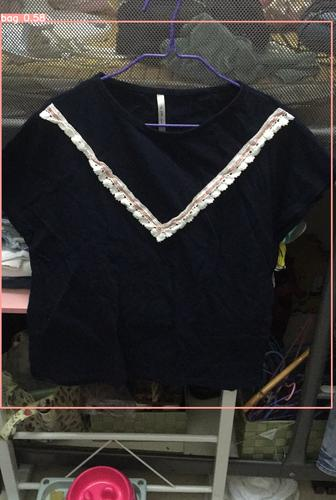
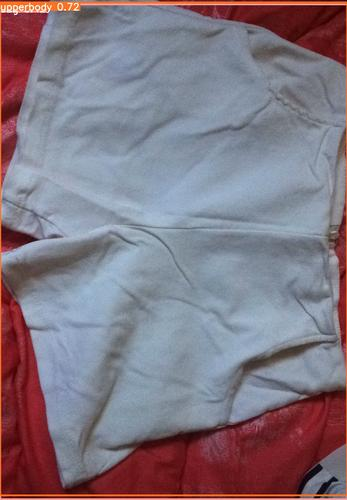
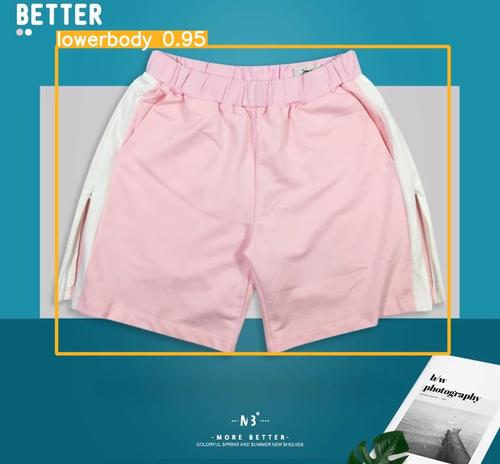

In [31]:
HTML(f)